In [24]:
import tensorflow as tf
import requests
import io
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [25]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
#link to download the CSV file
s=requests.get(url).content
#line1-------------
Iris=pd.read_csv(io.StringIO(s.decode('utf-8')))
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
Iris.shape

(150, 5)

In [27]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris = Iris.head(100)
Iris.shape

(100, 5)

In [28]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris['species'] = Iris['species'].replace(['setosa','versicolor'],[0,1])

In [29]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


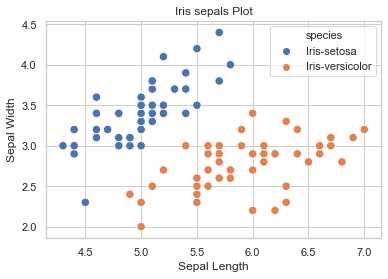

In [30]:
#visualization of given dataset
#codesegment4------------------
ax=sns.scatterplot(x=Iris.sepal_length, y=Iris.sepal_width, hue=Iris.species.replace([0,1],['Iris-setosa','Iris-versicolor']),s=70)
plt.title('Iris sepals Plot')
# Set x-axis label
plt.xlabel('Sepal Length')
# Set y-axis label
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.show()

In [31]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [32]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
#line6-------------
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index= np.random.permutation(X.shape[0])[:80]
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [33]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [34]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    cmax = np.max(data, axis=0)
    cmin = np.min(data, axis=0)
    return np.divide(data - cmin, cmax - cmin)

In [35]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [36]:
# Define placeholders
'''A placeholder has the purpose of feeding the tensor. Placeholder is used to initialize the data to 
flow inside the tensors. To supply a placeholder, you need to use the method feed_dict. The placeholder 
will be fed only within a session. '''
'''Variables are used to hold the values of the weights and the biases that are optimized during the model training process
'''
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [37]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod = tf.matmul(data, W) + b

In [38]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [39]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
learning_rate = 0.003
#batch_size---- #using batch makes the training ------?
#line13--------------------------------
batch_size = 30
#iter_num
iter_num = 1500

In [40]:
# Define the optimizer with name opt
#line14-----------------------------
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [41]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [42]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [43]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
#Write the command to calculate test accuracy:
#line18-------------------------------
temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.232865 train_acc: 1.000000
epoch:  200 loss: 0.178283 train_acc: 1.000000
epoch:  300 loss: 0.172024 train_acc: 1.000000
epoch:  400 loss: 0.155354 train_acc: 1.000000
epoch:  500 loss: 0.138955 train_acc: 1.000000
epoch:  600 loss: 0.148513 train_acc: 1.000000
epoch:  700 loss: 0.126707 train_acc: 1.000000
epoch:  800 loss: 0.116719 train_acc: 1.000000
epoch:  900 loss: 0.112944 train_acc: 1.000000
epoch: 1000 loss: 0.123823 train_acc: 1.000000
epoch: 1100 loss: 0.105581 train_acc: 1.000000
epoch: 1200 loss: 0.113570 train_acc: 1.000000
epoch: 1300 loss: 0.112942 train_acc: 1.000000
epoch: 1400 loss: 0.100930 train_acc: 1.000000
epoch: 1500 loss: 0.072313 train_acc: 1.000000
The test accuracy is: 1.000000


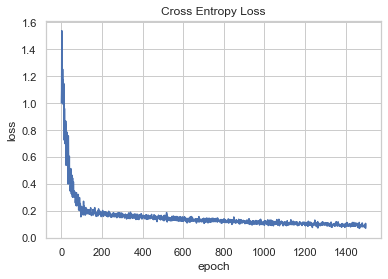

In [44]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

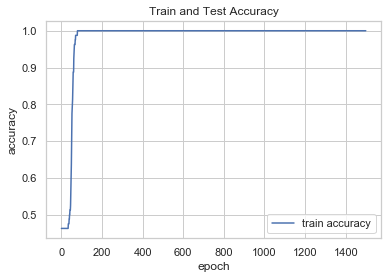

In [45]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(train_acc, 'b-', label='train accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()